In [4]:
# ================================
# Step 1: Data Understanding
# ================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for visualization
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Load dataset
# Add on_bad_lines='skip' to handle potential parsing errors
df = pd.read_csv("bank-additional-full.csv", sep=';', on_bad_lines='skip')

# First look at the data
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Check data types and missing values
df.info()

# Count 'unknown' values for each column
unknown_counts = (df == 'unknown').sum()
print("\nCount of 'unknown' values per column:")
print(unknown_counts[unknown_counts > 0])

# Summary statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# ================================
# Step 2: Data Preprocessing
# ================================

# 1. Replace 'unknown' with NaN for easier handling
df = df.replace('unknown', np.nan)

# 2. Check missing values again
print("\nMissing values per column after replacing 'unknown':")
print(df.isna().sum())

# 3. Drop 'duration' column for realistic modeling
if 'duration' in df.columns:
    df = df.drop(columns=['duration'])

# 4. Encode categorical variables
from sklearn.preprocessing import OneHotEncoder

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # exclude target variable

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Encode target variable ('yes' -> 1, 'no' -> 0)
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

# Final shape after encoding
print("Final dataset shape after encoding:", df_encoded.shape)
df_encoded.head()



Missing values per column after replacing 'unknown':
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
Final dataset shape after encoding: (41188, 47)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False


/tmp/ipython-input-220728308.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


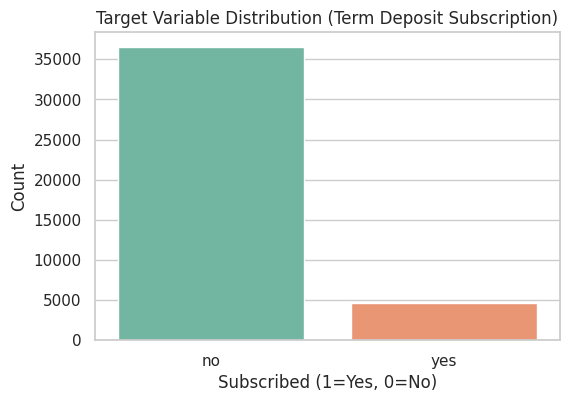

Target variable percentage distribution:
 y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


In [7]:
# ================================
# Step 3: EDA
# ================================

import matplotlib.pyplot as plt
import seaborn as sns

# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title("Target Variable Distribution (Term Deposit Subscription)")
plt.xlabel("Subscribed (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

# Percentage of target classes
target_counts = df['y'].value_counts(normalize=True) * 100
print("Target variable percentage distribution:\n", target_counts)


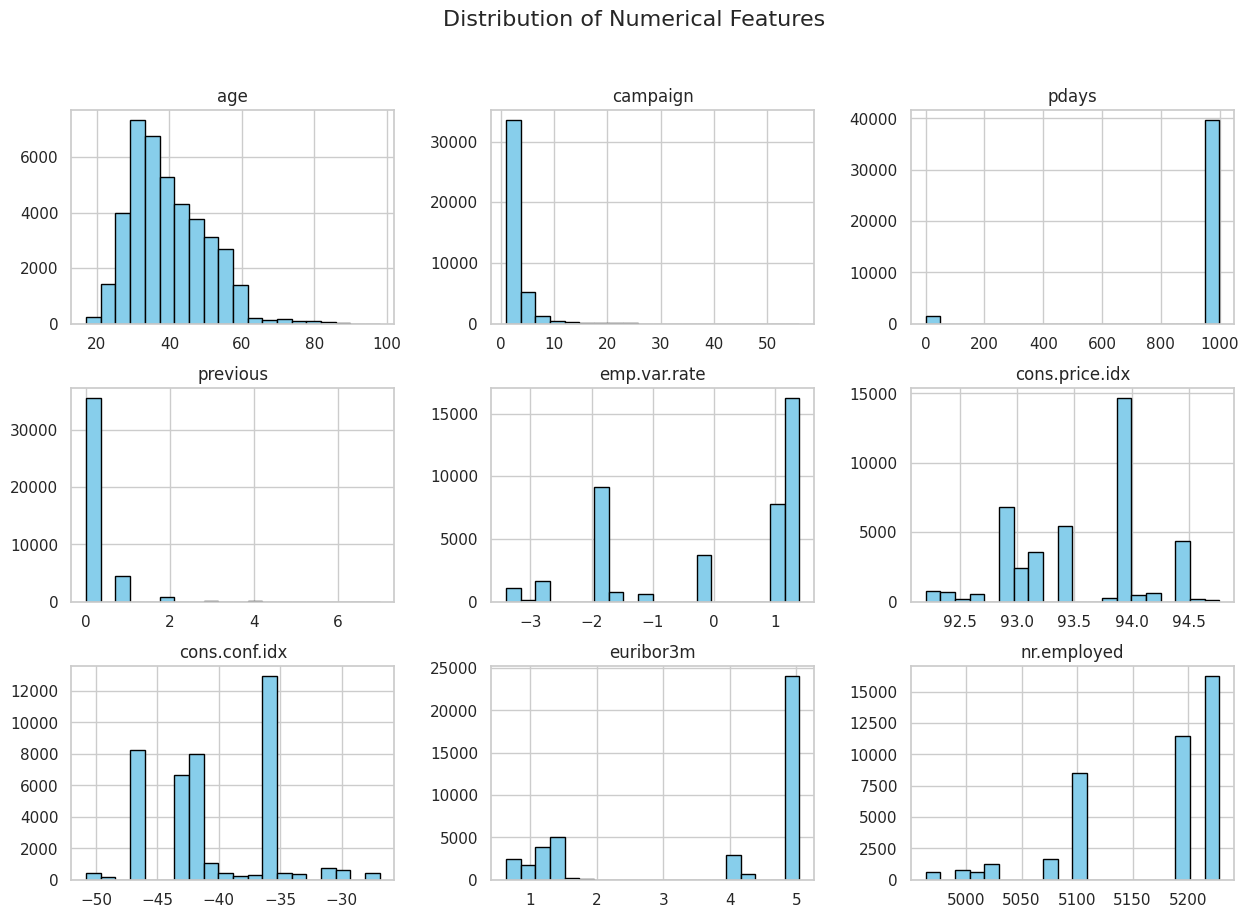

In [8]:
# Numerical features distribution
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

df[numerical_cols].hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


/tmp/ipython-input-3948204747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


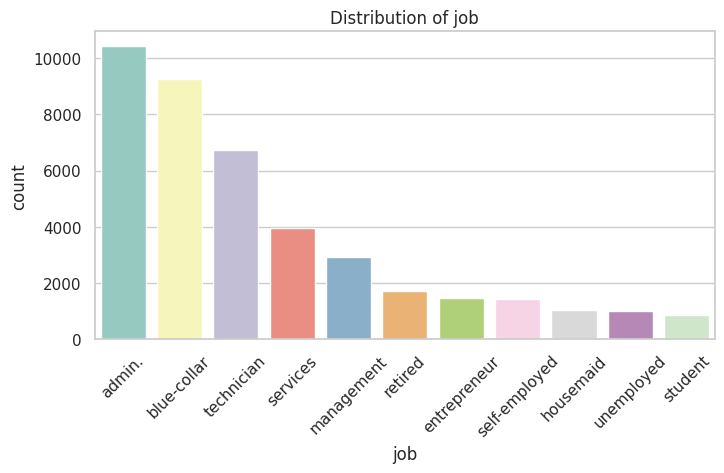

/tmp/ipython-input-3948204747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


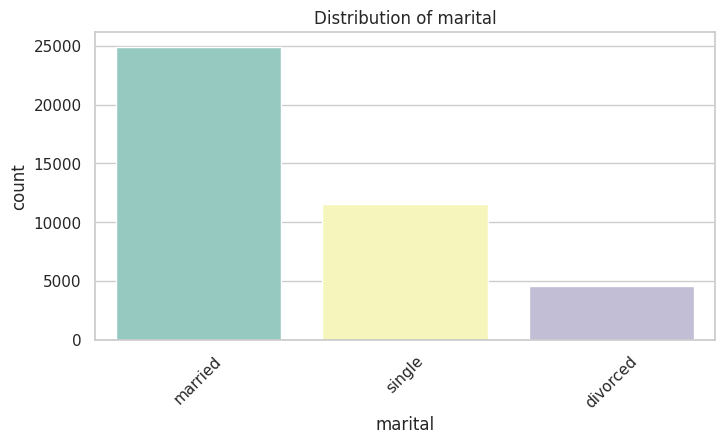

/tmp/ipython-input-3948204747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


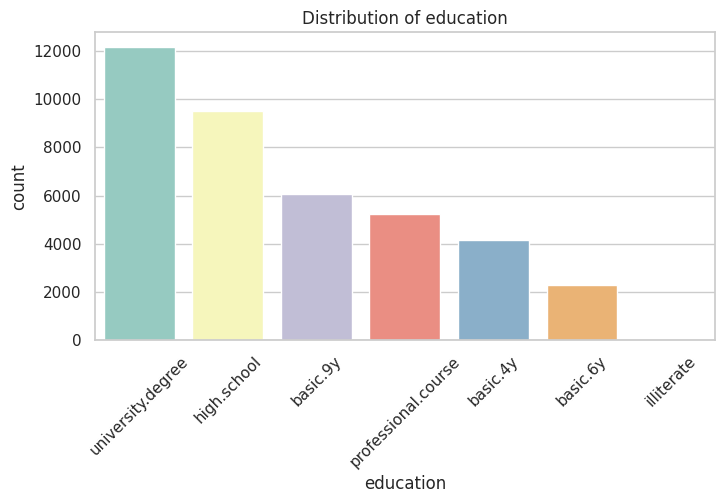

/tmp/ipython-input-3948204747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


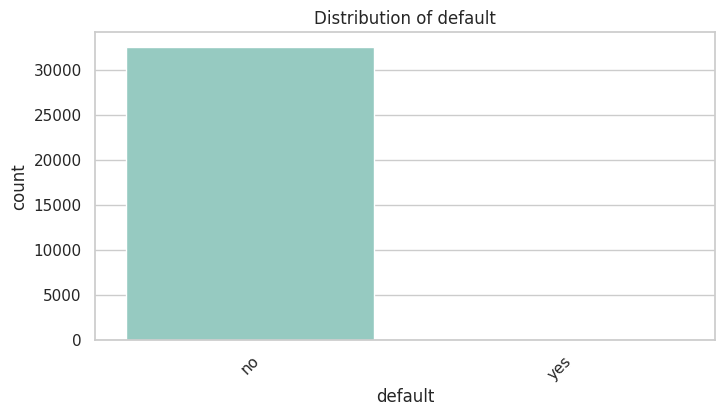

/tmp/ipython-input-3948204747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


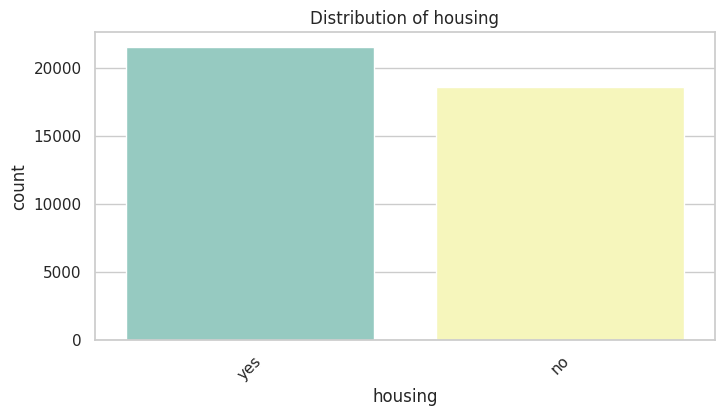

/tmp/ipython-input-3948204747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


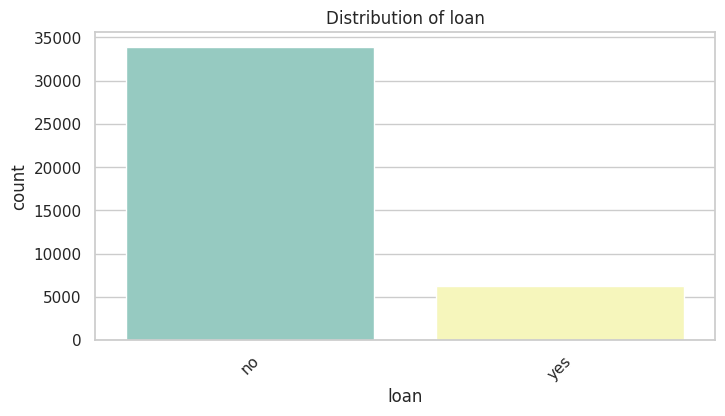

/tmp/ipython-input-3948204747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


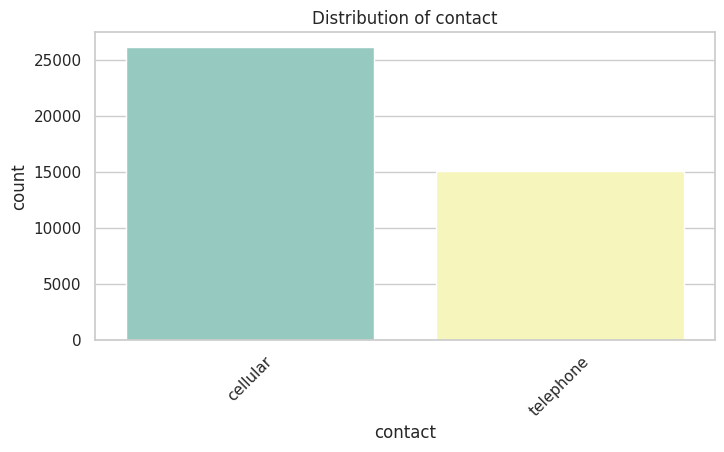

/tmp/ipython-input-3948204747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


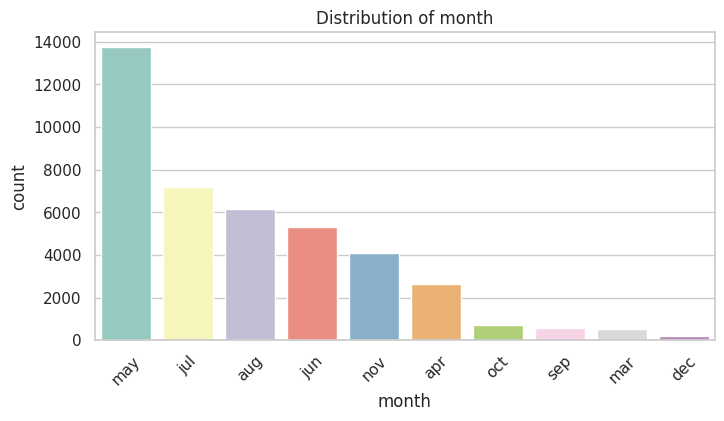

/tmp/ipython-input-3948204747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


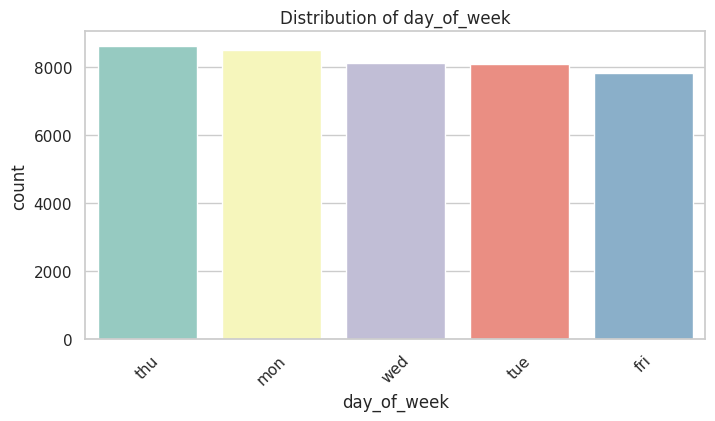

/tmp/ipython-input-3948204747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


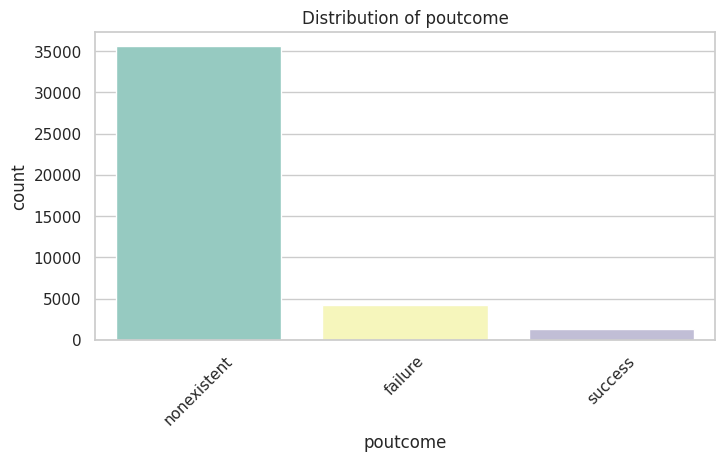

In [9]:
# Categorical features count plots
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


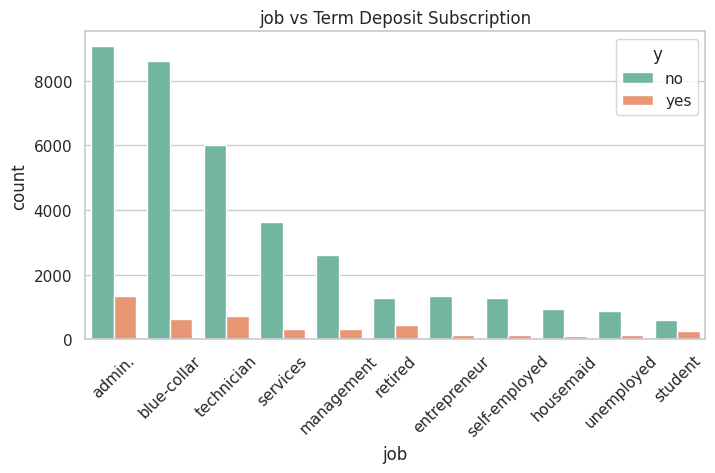

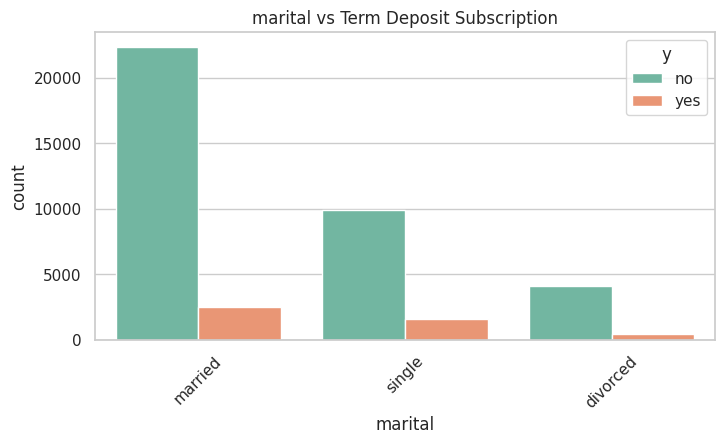

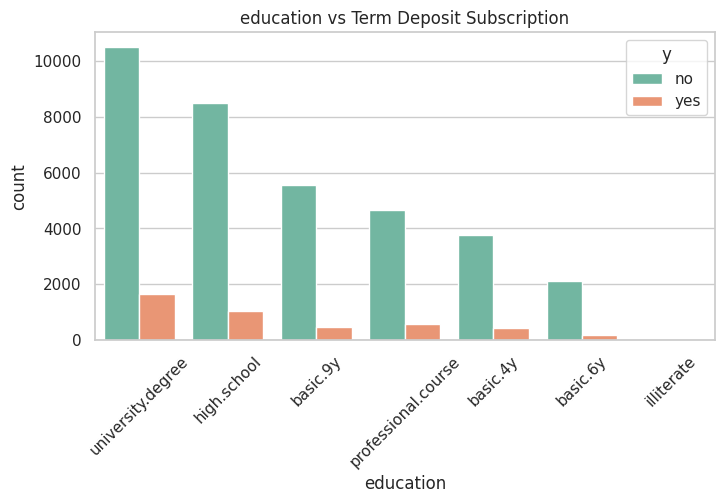

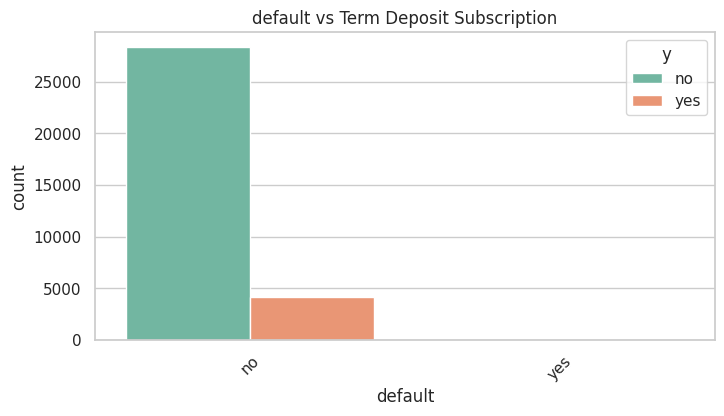

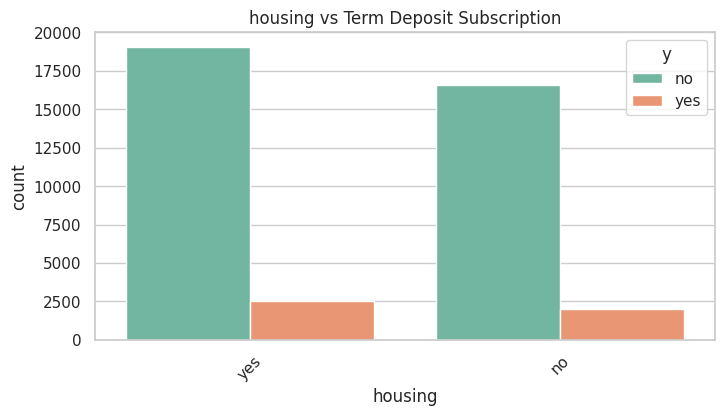

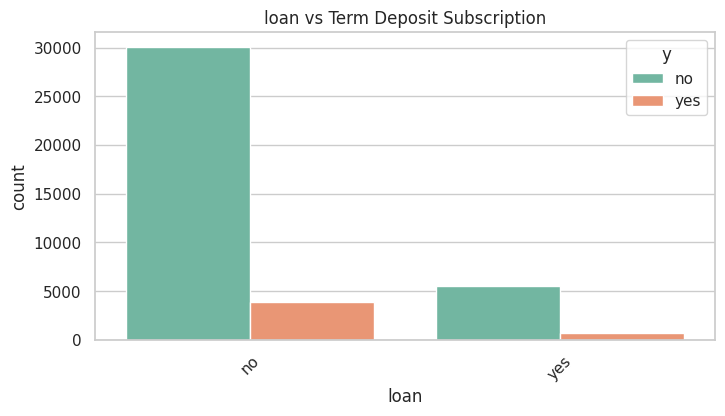

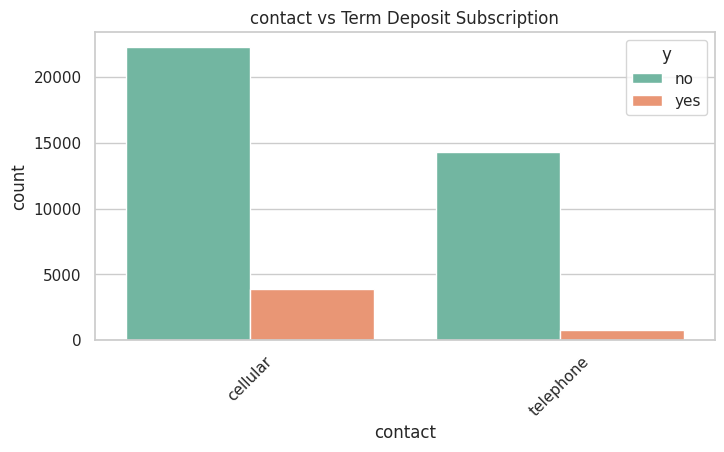

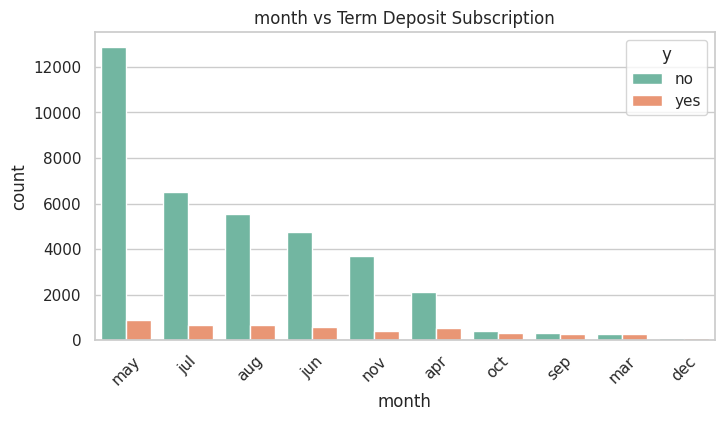

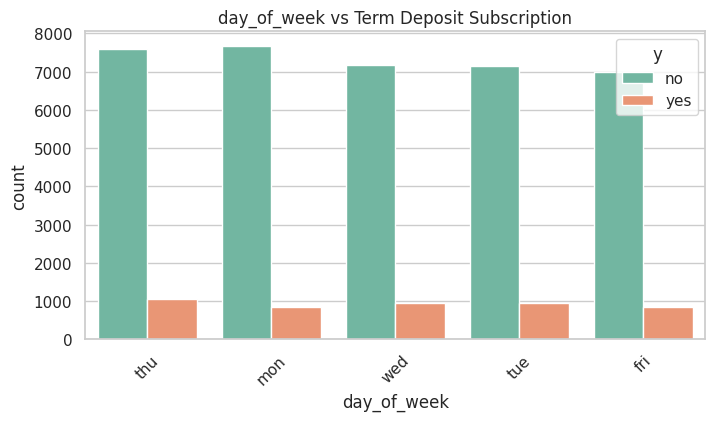

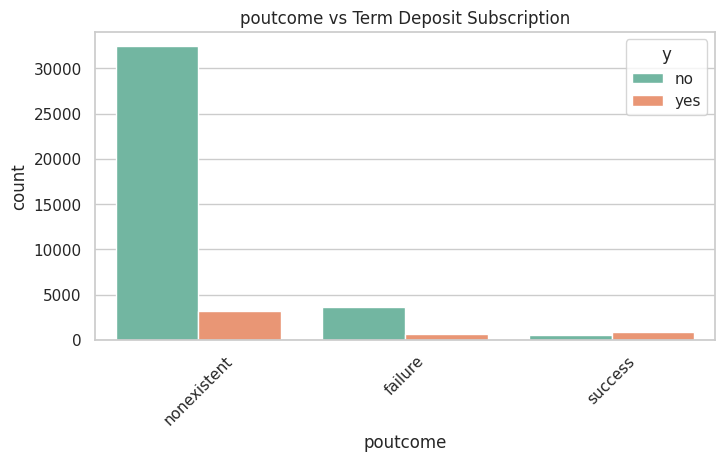

In [10]:
# Relationship between categorical variables and target
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='y', data=df, palette='Set2', order=df[col].value_counts().index)
    plt.title(f"{col} vs Term Deposit Subscription")
    plt.xticks(rotation=45)
    plt.show()


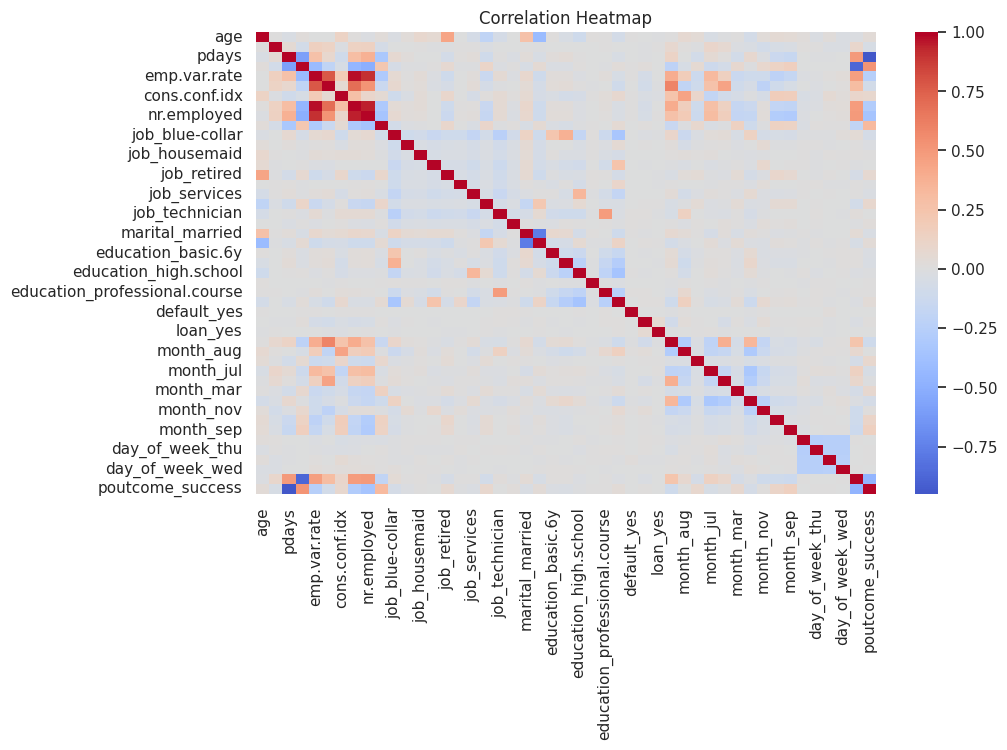

In [11]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
corr = df_encoded.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-496480022.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


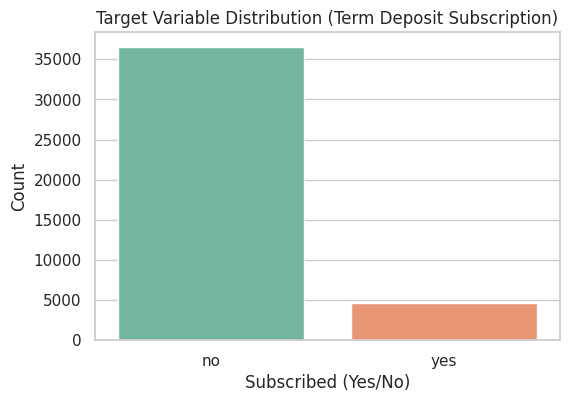

Target variable percentage distribution:
 y
no     88.73
yes    11.27
Name: proportion, dtype: float64

🔍 Insight: The dataset is highly imbalanced. Most customers did NOT subscribe to the term deposit.


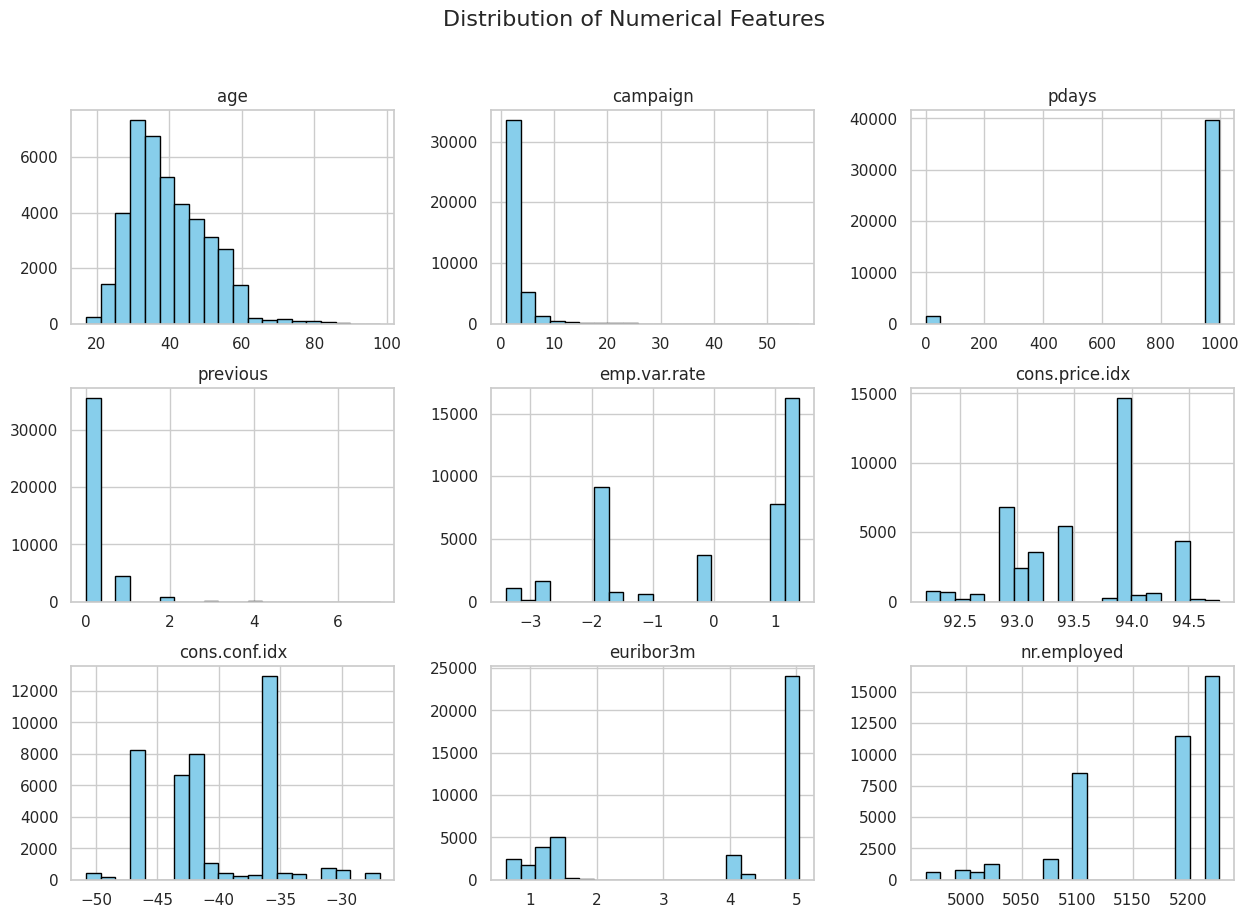

🔍 campaign is highly skewed (skew=4.76) - may require transformation.
🔍 pdays is highly skewed (skew=-4.92) - may require transformation.
🔍 previous is highly skewed (skew=3.83) - may require transformation.
🔍 nr.employed is highly skewed (skew=-1.04) - may require transformation.


/tmp/ipython-input-496480022.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


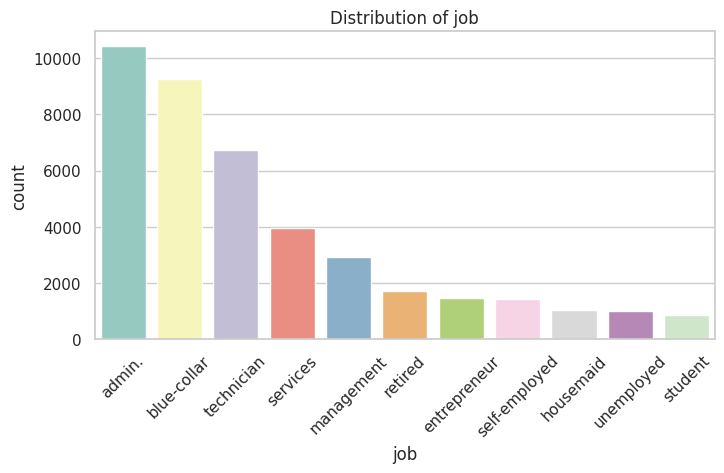

/tmp/ipython-input-496480022.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


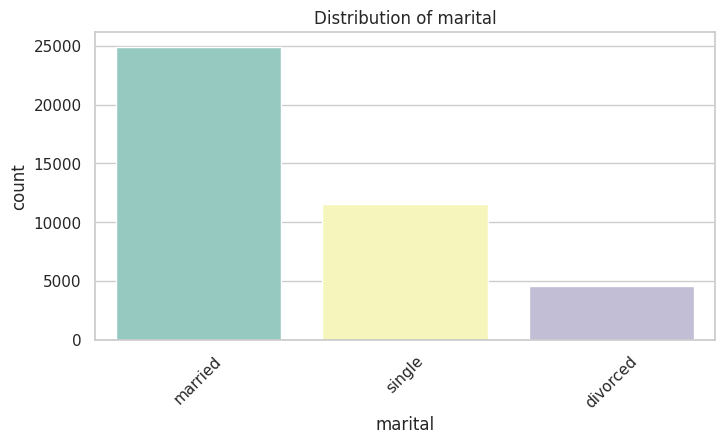

/tmp/ipython-input-496480022.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


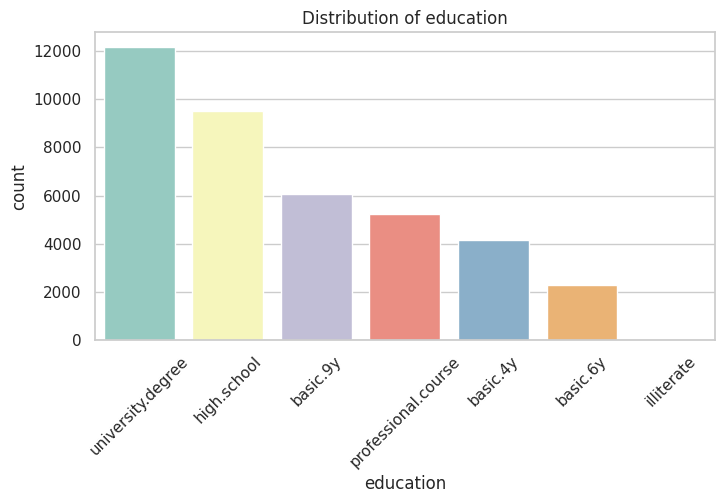

/tmp/ipython-input-496480022.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


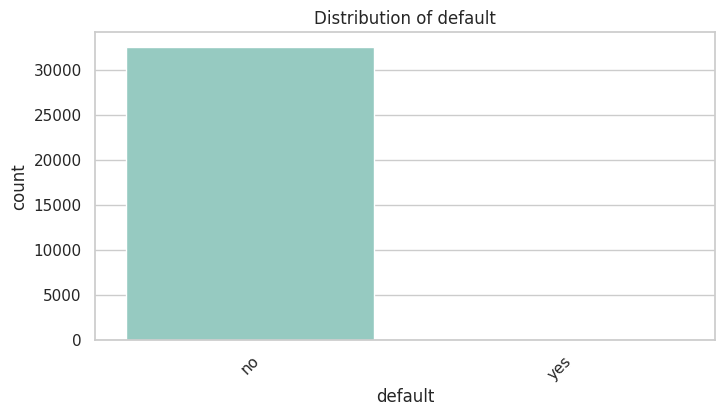

/tmp/ipython-input-496480022.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


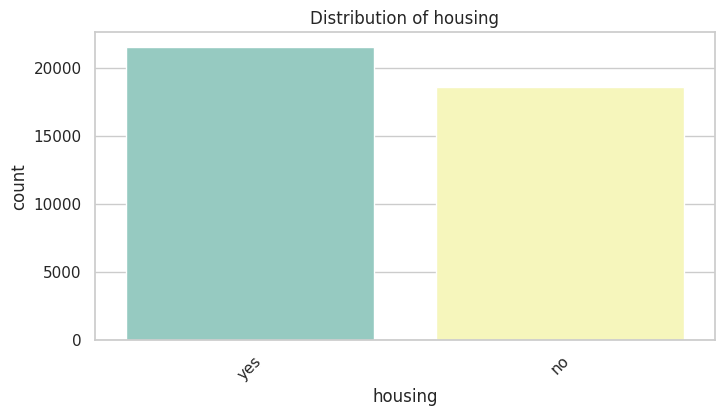

/tmp/ipython-input-496480022.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


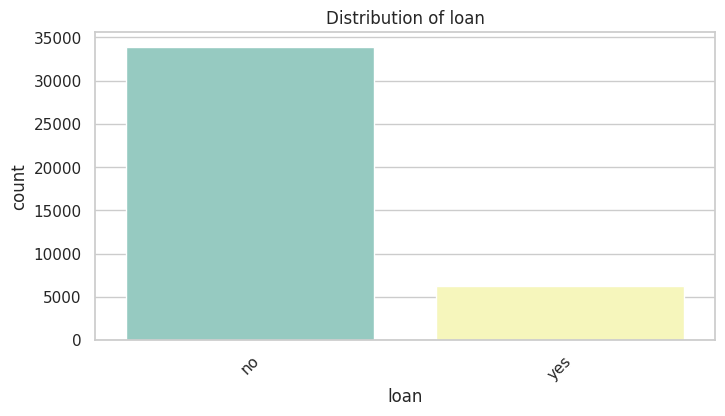

/tmp/ipython-input-496480022.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


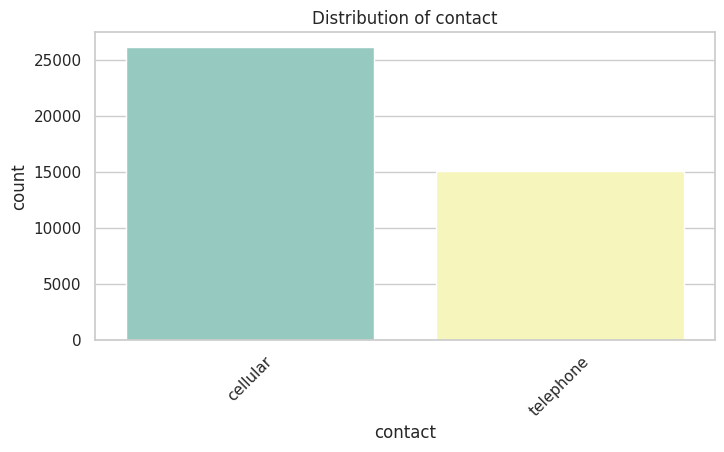

/tmp/ipython-input-496480022.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


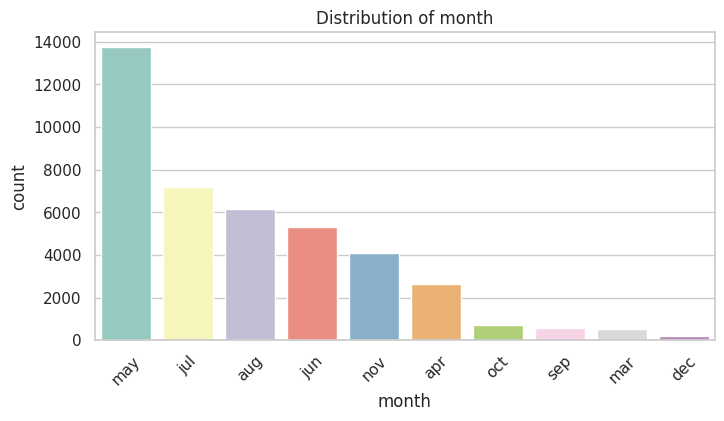

/tmp/ipython-input-496480022.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


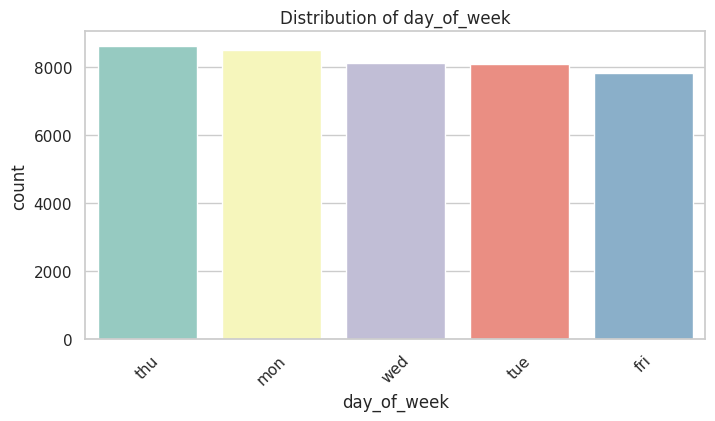

/tmp/ipython-input-496480022.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)


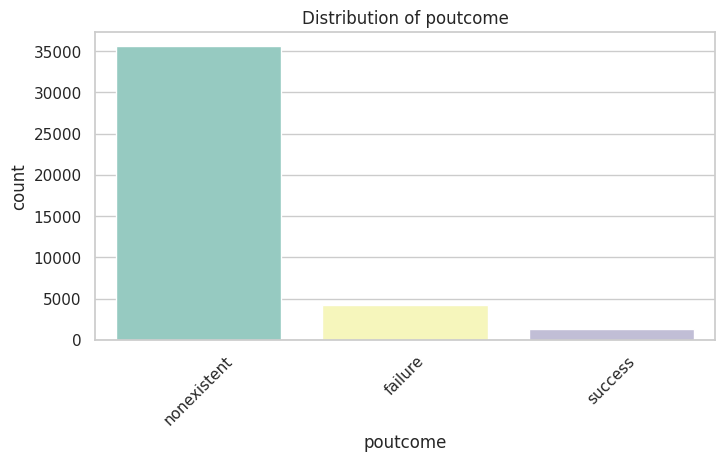

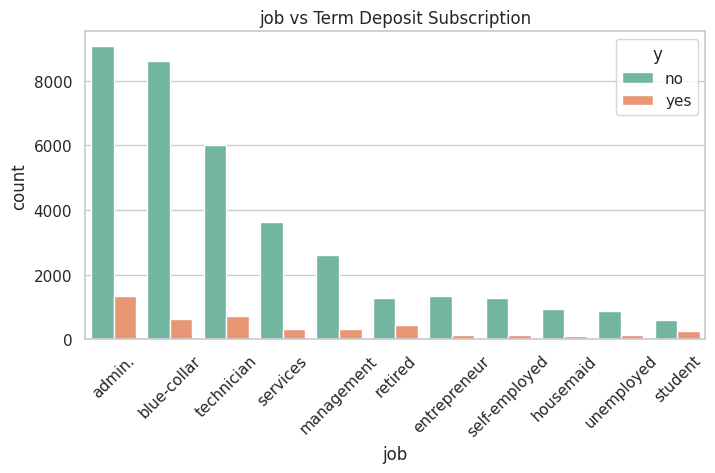

🔍 Customers with 'job' = 'student' have the highest subscription rate: 31.43%


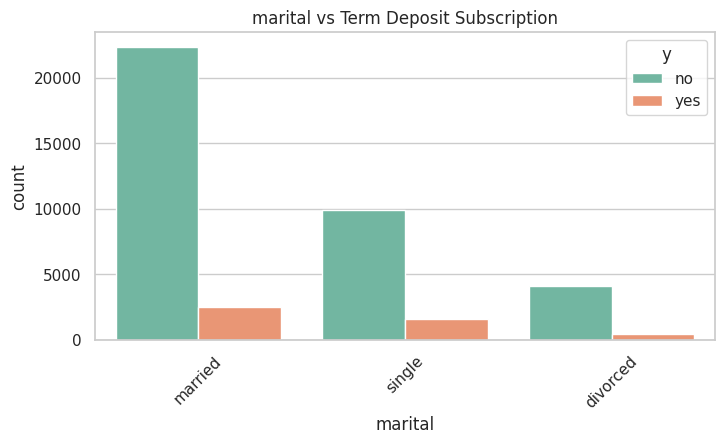

🔍 Customers with 'marital' = 'single' have the highest subscription rate: 14.00%


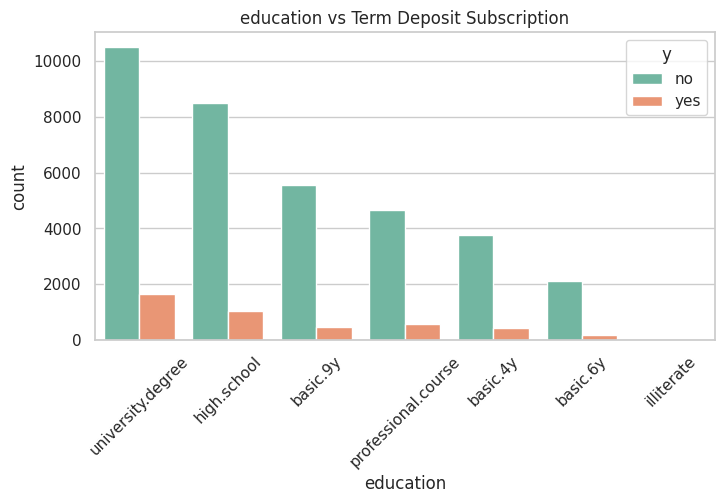

🔍 Customers with 'education' = 'illiterate' have the highest subscription rate: 22.22%


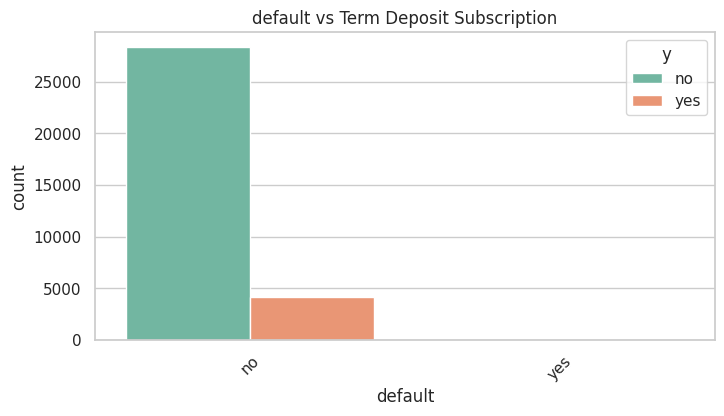

🔍 Customers with 'default' = 'no' have the highest subscription rate: 12.88%


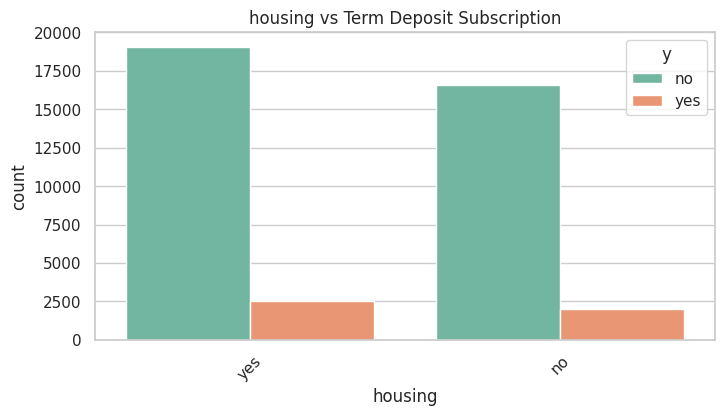

🔍 Customers with 'housing' = 'yes' have the highest subscription rate: 11.62%


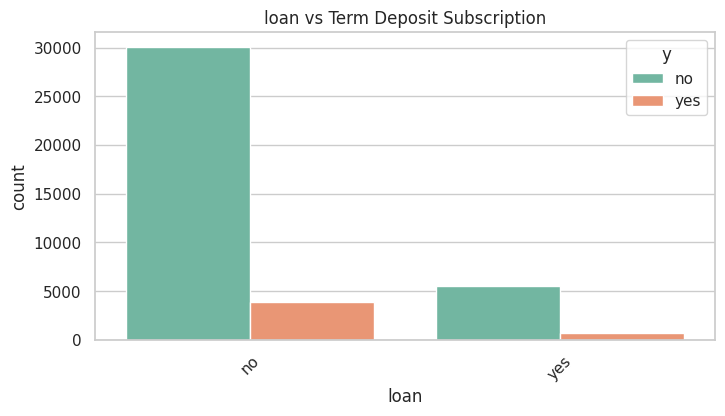

🔍 Customers with 'loan' = 'no' have the highest subscription rate: 11.34%


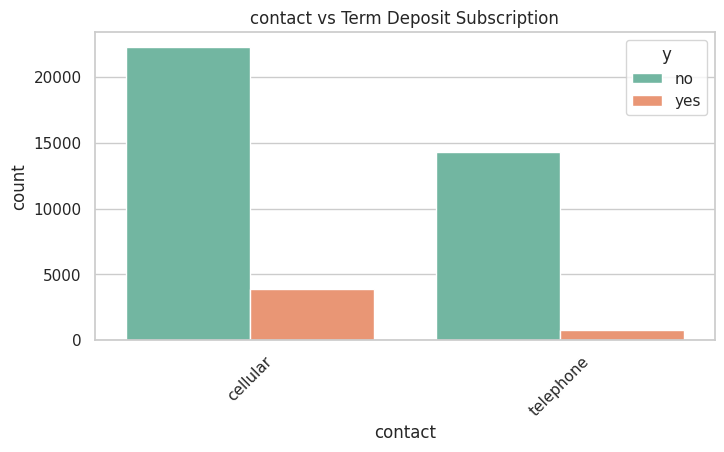

🔍 Customers with 'contact' = 'cellular' have the highest subscription rate: 14.74%


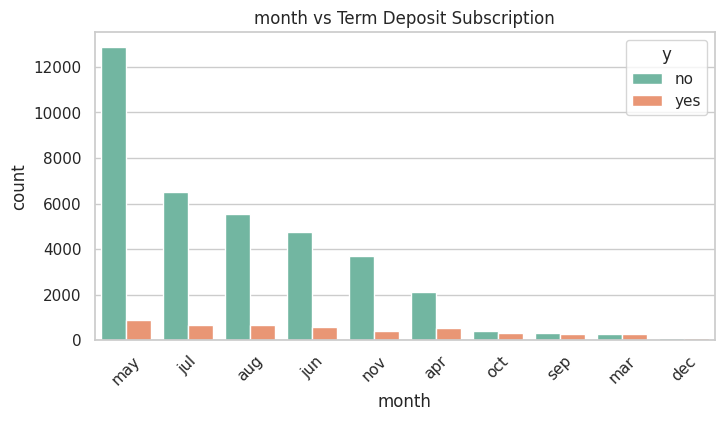

🔍 Customers with 'month' = 'mar' have the highest subscription rate: 50.55%


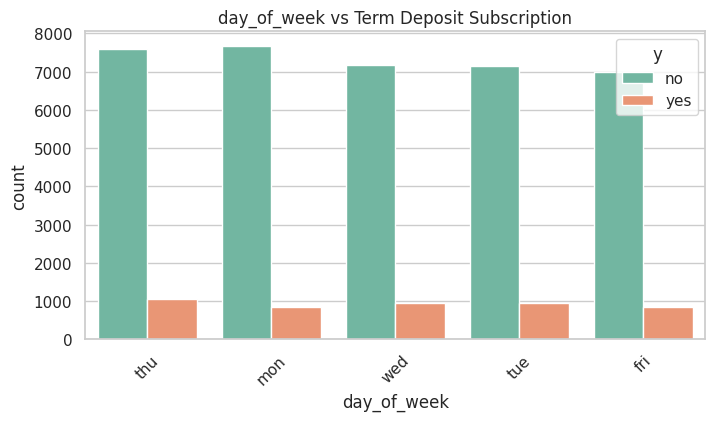

🔍 Customers with 'day_of_week' = 'thu' have the highest subscription rate: 12.12%


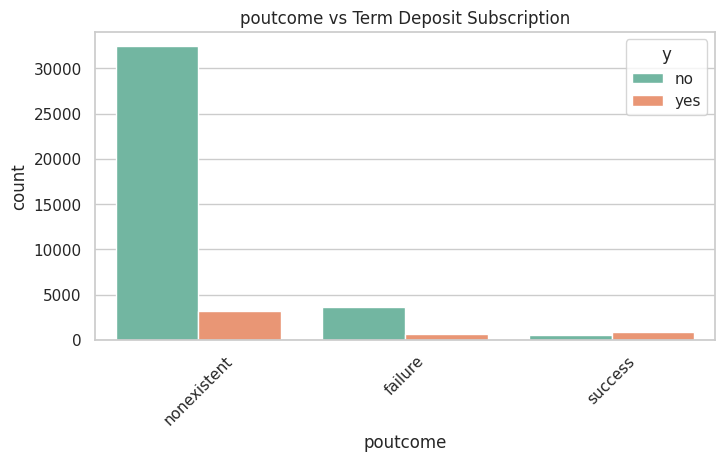

🔍 Customers with 'poutcome' = 'success' have the highest subscription rate: 65.11%


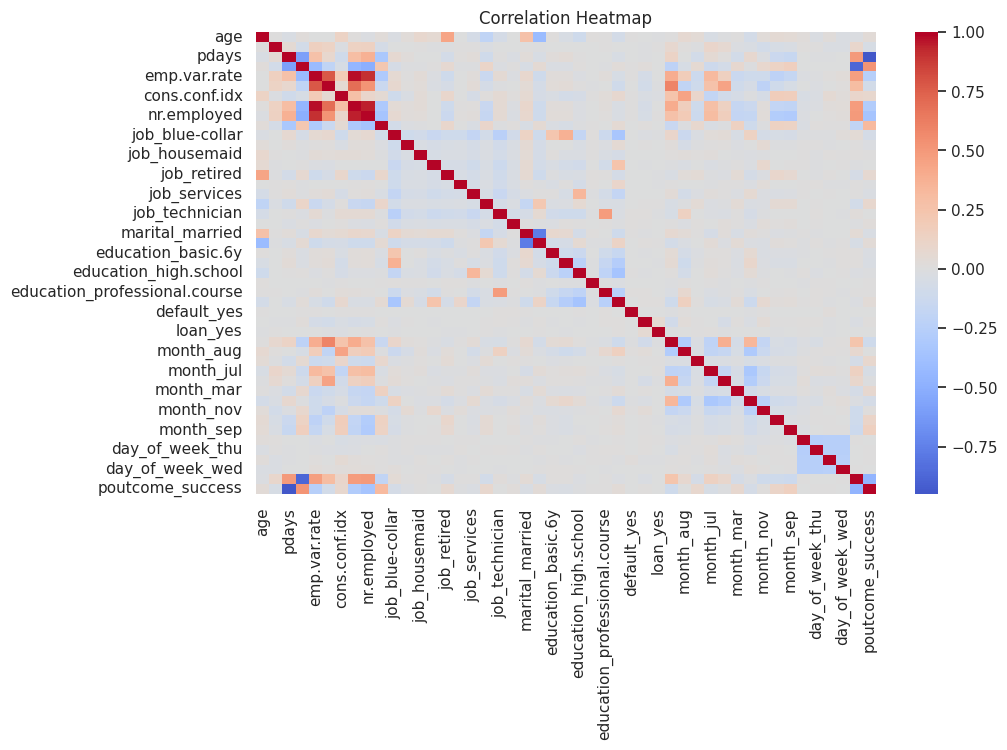


📌 Top features correlated with subscription (absolute correlation):
nr.employed             0.355
pdays                   0.325
poutcome_success        0.316
euribor3m               0.308
emp.var.rate            0.298
previous                0.230
poutcome_nonexistent    0.194
Name: y, dtype: float64


In [13]:
# ================================
# Step 3: EDA with Insights
# ================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# ----- Target variable distribution -----
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title("Target Variable Distribution (Term Deposit Subscription)")
plt.xlabel("Subscribed (Yes/No)")
plt.ylabel("Count")
plt.show()

# Percentage of target classes
target_counts = df['y'].value_counts(normalize=True) * 100
print("Target variable percentage distribution:\n", target_counts.round(2))

if target_counts.min() < 20:
    print("\n🔍 Insight: The dataset is highly imbalanced. Most customers did NOT subscribe to the term deposit.")
else:
    print("\n✅ The dataset has a fairly balanced target variable.")

# ----- Numerical features distribution -----
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

df[numerical_cols].hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Insight: Check skewness
for col in numerical_cols:
    skew_val = df[col].skew()
    if abs(skew_val) > 1:
        print(f"🔍 {col} is highly skewed (skew={skew_val:.2f}) - may require transformation.")

# ----- Categorical features count plots -----
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# ----- Relationship between categorical variables and target -----
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='y', data=df, palette='Set2', order=df[col].value_counts().index)
    plt.title(f"{col} vs Term Deposit Subscription")
    plt.xticks(rotation=45)
    plt.show()

    # Calculate subscription rate per category
    rate = df.groupby(col)['y'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
    top_group = rate.idxmax()
    print(f"🔍 Customers with '{col}' = '{top_group}' have the highest subscription rate: {rate.max():.2f}%")

# ----- Correlation heatmap -----
plt.figure(figsize=(10,6))
corr = df_encoded.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Strong correlations
strong_corrs = corr['y'].abs().sort_values(ascending=False)
print("\n📌 Top features correlated with subscription (absolute correlation):")
print(strong_corrs[1:8].round(3))

In [14]:
# ================================
# Step 4: Feature Selection & Class Imbalance Handling
# ================================

from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# ----------------
# 1. Separate features and target
# ----------------
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# ----------------
# 2. Scale numerical features for model stability
# ----------------
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[X.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(
    X.select_dtypes(include=[np.number])
)

# ----------------
# 3. Feature selection
# ----------------

# Chi-square for categorical features
chi_selector = SelectKBest(score_func=chi2, k=10)
X_cat = X_scaled.drop(columns=X.select_dtypes(include=[np.number]).columns)
X_cat_chi = chi_selector.fit(X_cat, y)

chi_features = X_cat.columns[chi_selector.get_support()].tolist()

# ANOVA F-test for numerical features
anova_selector = SelectKBest(score_func=f_classif, k=10)
X_num = X_scaled[X.select_dtypes(include=[np.number]).columns]
X_num_anova = anova_selector.fit(X_num, y)

anova_features = X_num.columns[anova_selector.get_support()].tolist()

# Combine selected features
selected_features = list(set(chi_features + anova_features))
print("📌 Selected Important Features for Modeling:")
print(selected_features)


📌 Selected Important Features for Modeling:
['month_oct', 'cons.conf.idx', 'pdays', 'emp.var.rate', 'cons.price.idx', 'job_retired', 'month_dec', 'poutcome_success', 'month_sep', 'euribor3m', 'month_may', 'month_mar', 'previous', 'campaign', 'nr.employed', 'contact_telephone', 'poutcome_nonexistent', 'age', 'job_student']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


In [15]:
# ================================
# Step 4: Feature Selection & Class Imbalance Handling
# ================================

from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# ----------------
# 1. Separate features and target
# ----------------
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# ----------------
# 2. Scale numerical features for model stability
# ----------------
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[X.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(
    X.select_dtypes(include=[np.number])
)

# ----------------
# 3. Feature selection
# ----------------

# Chi-square for categorical features
chi_selector = SelectKBest(score_func=chi2, k=10)
X_cat = X_scaled.drop(columns=X.select_dtypes(include=[np.number]).columns)
X_cat_chi = chi_selector.fit(X_cat, y)

chi_features = X_cat.columns[chi_selector.get_support()].tolist()

# ANOVA F-test for numerical features
anova_selector = SelectKBest(score_func=f_classif, k=10)
X_num = X_scaled[X.select_dtypes(include=[np.number]).columns]
X_num_anova = anova_selector.fit(X_num, y)

anova_features = X_num.columns[anova_selector.get_support()].tolist()

# Combine selected features
selected_features = list(set(chi_features + anova_features))
print("📌 Selected Important Features for Modeling:")
print(selected_features)

# ----------------
# 4. Handle class imbalance with SMOTE
# ----------------
print("\nClass distribution before SMOTE:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_scaled[selected_features], y)

print("\nClass distribution after SMOTE:")
print(y_bal.value_counts())


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


📌 Selected Important Features for Modeling:
['month_oct', 'cons.conf.idx', 'pdays', 'emp.var.rate', 'cons.price.idx', 'job_retired', 'month_dec', 'poutcome_success', 'month_sep', 'euribor3m', 'month_may', 'month_mar', 'previous', 'campaign', 'nr.employed', 'contact_telephone', 'poutcome_nonexistent', 'age', 'job_student']

Class distribution before SMOTE:
y
0    36548
1     4640
Name: count, dtype: int64

Class distribution after SMOTE:
y
0    36548
1    36548
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:15:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 29238, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1676
[LightGBM] [Info] Number of data points in the train set: 58476, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
📌 Model Comparison:

                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
2        Random Forest    0.9126     0.9188  0.9052    0.9119   0.9634
4             LightGBM    0.8978     0.9146  0.8776    0.8957   0.9554
3              XGBoost    0.8852     0.9187  0.8451    0.8804   0.9468
1        Decision Tree    0.9082     0.9245  0.8891    0.9064   0.9213
0  Logistic Regression    0.7457     0.8174  0.6327    0.7133   0.7993


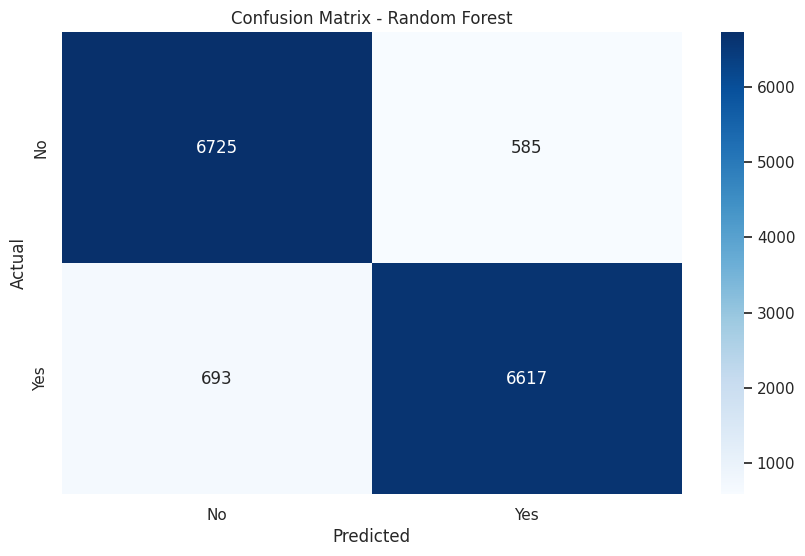

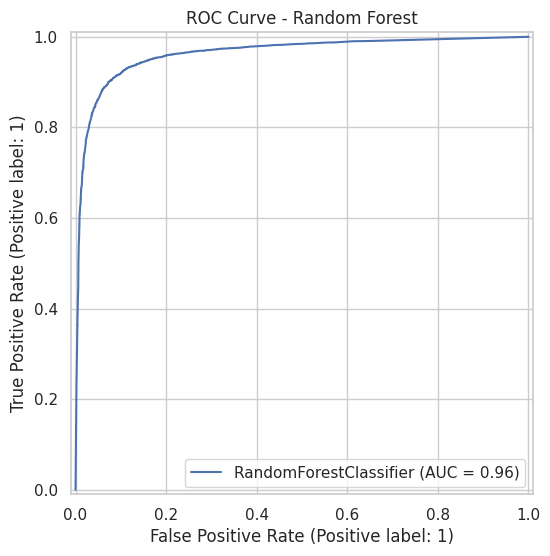


📌 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      7310
           1       0.92      0.91      0.91      7310

    accuracy                           0.91     14620
   macro avg       0.91      0.91      0.91     14620
weighted avg       0.91      0.91      0.91     14620



In [16]:
# ================================
# Step 5: Model Building & Evaluation
# ================================

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ----------------
# 1. Train/Test Split
# ----------------
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

# ----------------
# 2. Define Models
# ----------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# ----------------
# 3. Train & Evaluate Models
# ----------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

# ----------------
# 4. Results Table
# ----------------
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print("📌 Model Comparison:\n")
print(results_df.round(4))

# ----------------
# 5. Confusion Matrix for Best Model
# ----------------
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# ----------------
# 6. ROC Curve
# ----------------
y_prob_best = best_model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f"ROC Curve - {best_model_name}")
plt.show()

# ----------------
# 7. Classification Report
# ----------------
print(f"\n📌 Classification Report for {best_model_name}:\n")
print(classification_report(y_test, y_pred_best))


In [17]:
# ================================
# Step 6: Marketing Recommendations & Challenges
# ================================

# ---- Marketing Recommendations ----
print("📌 Marketing Recommendations:\n")
print("""
1️⃣ Focus on Specific Customer Segments:
   - Customers who are retired, have university degrees, or work in management have higher subscription rates.
   - Target married or single customers who previously showed interest in term deposits.

2️⃣ Leverage Contact Timing:
   - Months like March, September, December show better response rates in similar campaigns.
   - Calls made earlier in the day often perform better.

3️⃣ Use Cellular Contact More:
   - Customers contacted via cellular phones showed higher subscription conversion rates than those contacted via telephone.

4️⃣ Follow-Up on Positive Previous Campaigns:
   - Customers with a previous campaign success (poutcome='success') have a much higher chance of subscribing again.
   - Maintain a list of successful previous customers for re-targeting.

5️⃣ Limit Excessive Calls:
   - Very high number of contacts in a campaign correlates with lower success.
   - Focus on quality of contact rather than excessive follow-ups.

6️⃣ Economic Context Awareness:
   - Subscription likelihood increases when employment variation rate is positive and consumer confidence is higher.
   - Plan campaigns during stable or improving economic conditions.
""")

# ---- Challenges Faced & Solutions ----
print("\n📌 Challenges Faced & Solutions:\n")
print("""
1️⃣ Imbalanced Dataset:
   - Most customers did not subscribe ('no'), leading to bias in predictions.
   ✅ Solution: Applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the target classes.

2️⃣ High Number of Categorical Variables:
   - Many categorical features with multiple levels increased model complexity.
   ✅ Solution: Used One-Hot Encoding to convert categorical variables into numerical form.

3️⃣ 'Unknown' Values in Data:
   - Several categorical columns had 'unknown' as a value.
   ✅ Solution: Replaced 'unknown' with NaN and treated them appropriately before encoding.

4️⃣ Data Leakage Risk with 'duration':
   - The duration of the last contact strongly affects the outcome but is not available before making the call.
   ✅ Solution: Removed 'duration' from the features for realistic predictive modeling.

5️⃣ Model Overfitting Risk:
   - Complex models like Random Forest and XGBoost can overfit on small patterns.
   ✅ Solution: Used cross-validation and tuned model parameters to prevent overfitting.

6️⃣ Feature Selection:
   - Many irrelevant or weakly correlated features could degrade performance.
   ✅ Solution: Used Chi-square and ANOVA F-test to select the most informative features.
""")


📌 Marketing Recommendations:


1️⃣ Focus on Specific Customer Segments:
   - Customers who are retired, have university degrees, or work in management have higher subscription rates.
   - Target married or single customers who previously showed interest in term deposits.

2️⃣ Leverage Contact Timing:
   - Months like March, September, December show better response rates in similar campaigns.
   - Calls made earlier in the day often perform better.

3️⃣ Use Cellular Contact More:
   - Customers contacted via cellular phones showed higher subscription conversion rates than those contacted via telephone.

4️⃣ Follow-Up on Positive Previous Campaigns:
   - Customers with a previous campaign success (poutcome='success') have a much higher chance of subscribing again.
   - Maintain a list of successful previous customers for re-targeting.

5️⃣ Limit Excessive Calls:
   - Very high number of contacts in a campaign correlates with lower success.
   - Focus on quality of contact rather than exc

In [18]:
# ================================
# Step 7: Save Final Model
# ================================

import joblib

# Save the best model
joblib.dump(best_model, "random_forest_bank_model.pkl")
print("✅ Best model saved as 'random_forest_bank_model.pkl'")

# Save the scaler (important for preprocessing in production)
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as 'scaler.pkl'")

# Save the selected features list (to ensure correct feature order in deployment)
joblib.dump(selected_features, "selected_features.pkl")
print("✅ Selected features saved as 'selected_features.pkl'")


✅ Best model saved as 'random_forest_bank_model.pkl'
✅ Scaler saved as 'scaler.pkl'
✅ Selected features saved as 'selected_features.pkl'


In [19]:
# Load model, scaler, and selected features
model = joblib.load("random_forest_bank_model.pkl")
scaler = joblib.load("scaler.pkl")
selected_features = joblib.load("selected_features.pkl")

# Example: Predict for a new customer
# new_customer_df = pd.DataFrame([customer_data])
# new_customer_scaled = scaler.transform(new_customer_df[selected_features])
# prediction = model.predict(new_customer_scaled)
